In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
pd.options.display.max_columns = 1000

In [4]:
df = pd.read_csv('FE_fights')
df.head()

,BPrev,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,Date,Event_ID,Fight_ID,Last_round,RPrev,R_Age,R_Height,R_HomeTown,R_ID,R_Location,R_Name,R_Weight,winby,winner,avg_weight_lbs,weight_class,B_diff,R_diff,3_round,4_round,5_round
0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,02/03/2014,646,4580,3,0,39.0,190.0,"Las Vegas, Nevada USA",377,"Las Vegas, Nevada USA",Frank Mir,119.0,DEC,blue,262.9,Cruiserweight,0,0,1,0,0
1,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,02/03/2014,646,4589,5,0,32.0,170.0,Manaus Brazil,1052,Rio de Janeiro Brazil,Jose Aldo,65.0,DEC,red,143.0,Bantamweight,0,0,0,0,1
2,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,02/03/2014,646,4590,1,0,31.0,167.0,Natal Brazil,1527,Rio de Janeiro Brazil,Renan Barao,61.0,KO/TKO,red,134.2,Flyweight,0,0,0,0,1
3,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,02/03/2014,646,4605,3,0,37.0,160.0,"San Jose, California USA",1253,"Tucson, Arizona USA",Chris Cariaso,56.0,DEC,red,123.2,Strawwweight,0,0,1,0,0
4,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,02/03/2014,646,4631,3,0,37.0,182.0,"Englewood, NJ USA",464,"Brick, NJ USA",Nick Catone,84.0,DEC,red,184.8,Super Welterweight,0,0,1,0,0


In [5]:
en_winner = [1 if x=='blue' else 0 for x in df.winner]
df['en_winner'] = en_winner

In [6]:
columns = ['BPrev', 'B_Age', 'B_Height', 'B_Weight', 'Last_round', 'RPrev', 
           'R_Age', 'R_Height', 'R_Weight', 'B_diff', 'R_diff', '3_round',
           '4_round', '5_round']

In [7]:
data = df[columns]
# 1 means blue corner won
target = df['en_winner']

## Trying min-max normalization to improve out put of neural network

In [8]:
from sklearn.preprocessing import MinMaxScaler

# data_test = X_train[:100]

scaler = MinMaxScaler()
# print(scaler.fit(data_test))
# print(scaler.data_max_)
# print(scaler.transform(data_test)[:5])

In [9]:
print(scaler.fit(data))
print(scaler.data_max_)
data_norm = scaler.transform(data)

MinMaxScaler(copy=True, feature_range=(0, 1))
[1.400e+01 4.800e+01 2.130e+02 1.200e+02 5.000e+00 1.600e+01 4.800e+01
 2.130e+02 1.200e+02 1.659e+03 1.460e+03 1.000e+00 1.000e+00 1.000e+00]


In [10]:
data_norm = pd.DataFrame(data_norm, columns=columns)

In [11]:
data_norm.head()

,BPrev,B_Age,B_Height,B_Weight,Last_round,RPrev,R_Age,R_Height,R_Weight,B_diff,R_diff,3_round,4_round,5_round
0,0.0,0.642857,0.672131,1.000000,0.5,0.0,0.678571,0.622951,0.985294,0.0,0.0,1.0,0.0,0.0
1,0.0,0.571429,0.327869,0.191176,1.0,0.0,0.428571,0.295082,0.191176,0.0,0.0,0.0,0.0,1.0
2,0.0,0.678571,0.245902,0.132353,0.0,0.0,0.392857,0.245902,0.132353,0.0,0.0,0.0,0.0,1.0
3,0.0,0.464286,0.245902,0.058824,0.5,0.0,0.607143,0.131148,0.058824,0.0,0.0,1.0,0.0,0.0
4,0.0,0.571429,0.540984,0.470588,0.5,0.0,0.607143,0.491803,0.470588,0.0,0.0,1.0,0.0,0.0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, target, test_size=0.25)

# Use tesnsor flow to create a neural network to get better accuaracy 

In [13]:
import tensorflow as tf

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Input(shape=(14,)),
#   tf.keras.layers.Dense(80, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10)
# ])

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(14,), name='fight')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [15]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fight (InputLayer)           [(None, 14)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [16]:
X_train.describe()

,BPrev,B_Age,B_Height,B_Weight,Last_round,RPrev,R_Age,R_Height,R_Weight,B_diff,R_diff,3_round,4_round,5_round
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,0.171830,0.423707,0.412196,0.316405,0.348865,0.188881,0.445703,0.409523,0.317275,0.085882,0.109422,0.895460,0.007168,0.097372
std,0.181362,0.145199,0.143749,0.228558,0.249492,0.174505,0.147731,0.147744,0.227548,0.100397,0.103956,0.306051,0.084388,0.296552
min,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.321429,0.295082,0.132353,0.000000,0.062500,0.357143,0.295082,0.132353,0.000000,0.041096,1.000000,0.000000,0.000000
50%,0.142857,0.428571,0.409836,0.264706,0.500000,0.125000,0.428571,0.409836,0.264706,0.071730,0.095205,1.000000,0.000000,0.000000
75%,0.285714,0.535714,0.491803,0.470588,0.500000,0.312500,0.535714,0.528689,0.470588,0.122363,0.148630,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.813140,1.000000,1.000000,1.000000,1.000000


In [17]:
prediction = model(X_test.values)
prediction

W0318 14:15:50.955583  6160 base_layer.py:1790] Layer dense is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(559, 1), dtype=float32, numpy=
array([[ 4.14389223e-02],
       [ 2.56216899e-02],
       [-1.75175071e-03],
       [ 5.46120107e-04],
       [ 3.77239585e-02],
       [ 8.60682875e-03],
       [ 1.99743584e-02],
       [ 5.23568690e-03],
       [ 2.94934213e-02],
       [ 7.91833326e-02],
       [-7.57296383e-03],
       [ 9.12551582e-03],
       [ 2.10039318e-02],
       [ 8.50330591e-02],
       [ 8.18024874e-02],
       [ 2.73670256e-03],
       [ 7.21466839e-02],
       [-1.36683956e-02],
       [ 3.39163244e-02],
       [ 4.60354984e-03],
       [ 6.31441921e-02],
       [-9.95077193e-03],
       [-5.77630401e-02],
       [ 1.48659572e-02],
       [-4.17734087e-02],
       [ 3.57025653e-01],
       [-4.57461551e-02],
       [-1.55662298e-02],
       [-1.03722937e-01],
       [-4.27572951e-02],
       [ 6.08197302e-02],
       [-1.35266408e-02],
       [ 8.18227977e-02],
       [-3.22370231e-03],
       [ 2.11112201e-04],
       [ 7.73687065e-02],
       [-2.431

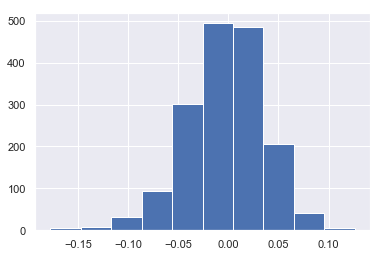

In [20]:
plt.hist(prediction.numpy());

## Determine Accuracy of model

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(prediction, y_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

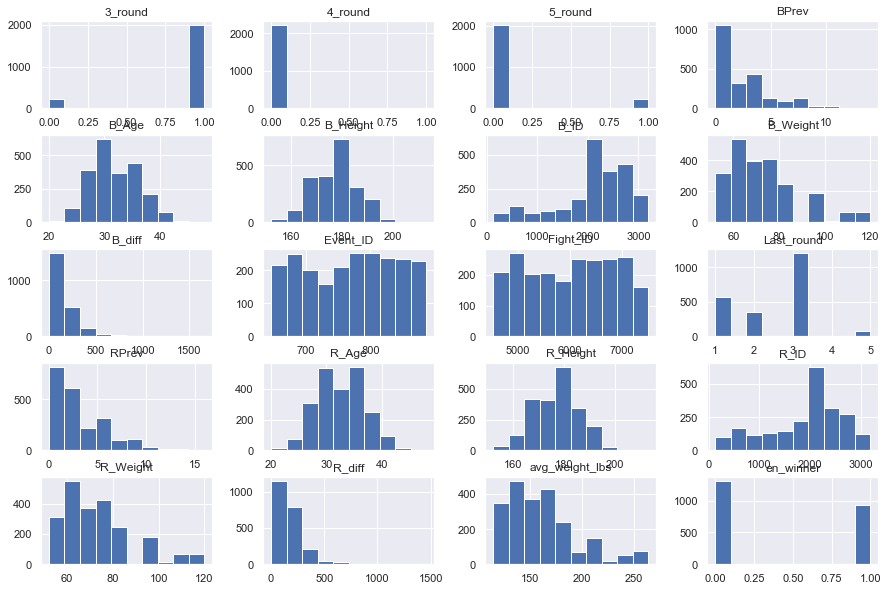

In [42]:
df.hist(figsize=(15, 10));

In [5]:
df.dtypes

BPrev               int64
B_Age             float64
B_Height          float64
B_HomeTown         object
B_ID                int64
B_Location         object
B_Name             object
B_Weight          float64
Date               object
Event_ID            int64
Fight_ID            int64
Last_round          int64
RPrev               int64
R_Age             float64
R_Height          float64
R_HomeTown         object
R_ID                int64
R_Location         object
R_Name             object
R_Weight          float64
winby              object
winner             object
avg_weight_lbs    float64
weight_class       object
B_diff              int64
R_diff              int64
3_round             int64
4_round             int64
5_round             int64
dtype: object

In [6]:
df.shape

(2233, 29)

In [17]:
len(columns)

14

In [10]:
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=10)
model.fit(X_train, y_train)

C:\Users\Patrick\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
import xgboost as xgb
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3,
    'max_depth': 3,
    'objective': 'multi:softprob',
    'num_class': 2
}

steps = 20 # Then number of training iterations 

C:\Users\Patrick\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [12]:
model = xgb.train(param, D_train, steps)
y_pred = model.predict(D_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
best_preds = np.asarray([np.argmax(line) for line in y_pred])
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.5696805452903013
Recall = 0.5450347646090972
Accuracy = 0.6010733452593918


In [14]:
preds = model.predict(X_test)
accuracy_score(y_test, preds)

AttributeError: 'DataFrame' object has no attribute 'feature_names'